# Aula 05

## Funções e estrutura de dados

In [57]:
import pandas as pd
import numpy as np


pd.set_option('display.float_format', lambda x: '%.2f' % x)

path = '/media/rey/Massa 2/Data_science/Data Science Em Produção - Meigarom Diego Fernandes Lopes/1. Python do ZERO ao DS/lab_local/dataset/kc_house_data.csv'
data = pd.read_csv(path)


In [8]:
print(f'rows: {data.shape[0]}')
print(f'cols: {data.shape[1]}')

rows: 21613
cols: 21


In [10]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
#convert object to date

data['date'] = pd.to_datetime(data['date'])

In [14]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Descriptive statistics

Tal como:
Média, mediana , std , min , max

obviamente, apenas nas colunas que são numéricas

In [30]:
#Agrupando features numéricas
numeric_attributes  = [cls for cls in data.columns if data[cls].dtype == 'float64' or data[cls].dtype =='int64']
print('>>numeric_attributes:', numeric_features ,
      len(numeric_features))


>>numeric_attributes: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 20


In [51]:
# retorna em formato de dataframe
numeric_attributes = data.select_dtypes(include= ['int64' , 'float64'])

# mean
media = pd.DataFrame(numeric_attributes.apply( np.mean ))
#median
mediana = pd.DataFrame(numeric_attributes.apply( np.median ))
#std
std = pd.DataFrame(numeric_attributes.apply( np.std ))
#min
min_ = pd.DataFrame(numeric_attributes.apply( np.min ))
#max
max_ = pd.DataFrame(numeric_attributes.apply( np.max ))

df1 = pd.concat([max_,min_,media,mediana,std], axis = 'columns').reset_index()
df1.columns = ['attributes','max','min','mean','median','std']

In [58]:
df1

,attributes,max,min,mean,median,std
0,id,9900000190.00,1000102.00,4580301520.86,3904930410.00,2876499023.43
1,price,7700000.00,75000.00,540088.14,450000.00,367118.70
2,bedrooms,33.00,0.00,3.37,3.00,0.93
3,bathrooms,8.00,0.00,2.11,2.25,0.77
4,sqft_living,13540.00,290.00,2079.90,1910.00,918.42
5,sqft_lot,1651359.00,520.00,15106.97,7618.00,41419.55
6,floors,3.50,1.00,1.49,1.50,0.54
7,waterfront,1.00,0.00,0.01,0.00,0.09
8,view,4.00,0.00,0.23,0.00,0.77
9,condition,5.00,1.00,3.41,3.00,0.65


In [59]:
print(f'rows: {df1.shape[0]}')
print(f'cols: {df1.shape[1]}')

rows: 20
cols: 6


In [67]:
data['dormitory_type'] = data['bedrooms'].apply([lambda x : 'studio' if x <= 1 else
                                                 'apartament' if x == 2 else
                                                 'house' if x > 2 else
                                                 np.NaN])

# Refazendo o cópdigo

In [70]:
# ETL - Extração, Transformação e Carga de dados


In [89]:
#libs
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import plotly.express as px


In [112]:
# functions
def show_dimentions (data):
    print(f'rows: {data.shape[0]}',end='\n\n')
    print(f'cols: {data.shape[1]}',end='\n\n')
    
    return None

def collect_geodata (data, cols):
    
    
    #initalize API
    geolocator = Nominatim (user_agent  = 'geoapi')
    
    data = data.head(20)
    
    #Create empty
    data.loc[:,cols[0]] ='NA'
    data.loc[:,cols[1]] ='NA'
    
    for i in range (len(data)):
        print(f'loop: {i}/{len(data)}')
        
    query = str(data.loc[i,'lat']) + ','+str(data.loc[i,'long'])
    response = geolocator.reverse(query)
    
    if cols[0] in response.raw['address']:
        data.loc[i,'house_number'] = response.raw['address'][cols[0]]
        
    if cols[1] in response.raw['address']:
        data.loc[i,'house_number'] = response.raw['address'][cols[1]]
    
    return data
    


## Extraction

In [99]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
path = '/media/rey/Massa 2/Data_science/Data Science Em Produção - Meigarom Diego Fernandes Lopes/1. Python do ZERO ao DS/lab_local/dataset/kc_house_data.csv'
data = pd.read_csv(path)


### Extraction Analysis

In [100]:
print(f'rows: {data.shape[0]}')
print(f'cols: {data.shape[1]}')

rows: 21613
cols: 21


## Transformation

In [106]:
# retorna em formato de dataframe
numeric_attributes = data.select_dtypes(include= ['int64' , 'float64'])

# mean
media = pd.DataFrame(numeric_attributes.apply( np.mean ))
#median
mediana = pd.DataFrame(numeric_attributes.apply( np.median ))
#std
std = pd.DataFrame(numeric_attributes.apply( np.std ))
#min
min_ = pd.DataFrame(numeric_attributes.apply( np.min ))
#max
max_ = pd.DataFrame(numeric_attributes.apply( np.max ))

df1 = pd.concat([max_,min_,media,mediana,std], axis = 'columns').reset_index()
df1.columns = ['attributes','max','min','mean','median','std']

show_dimentions(df1)

data['dormitory_type'] = data['bedrooms'].apply([lambda x : 'studio' if x <= 1 else
                                                 'apartament' if x == 2 else
                                                 'house' if x > 2 else
                                                 np.NaN])

show_dimentions(data)


data['level'] = 'NA'

houses = data[['id','lat','long','price','level']].copy()

data['level'] = data['price'].apply(lambda x: 0 if x<= 321950 else
                                              1 if x < 450000 else
                                              2 if  x <645000 else
                                              3 )

cols = ['roads','house_number']
df = data.head(20)

collect_geodata(df,cols)

data.loc[data['level']==3 ,['id','price','level']]

## Load

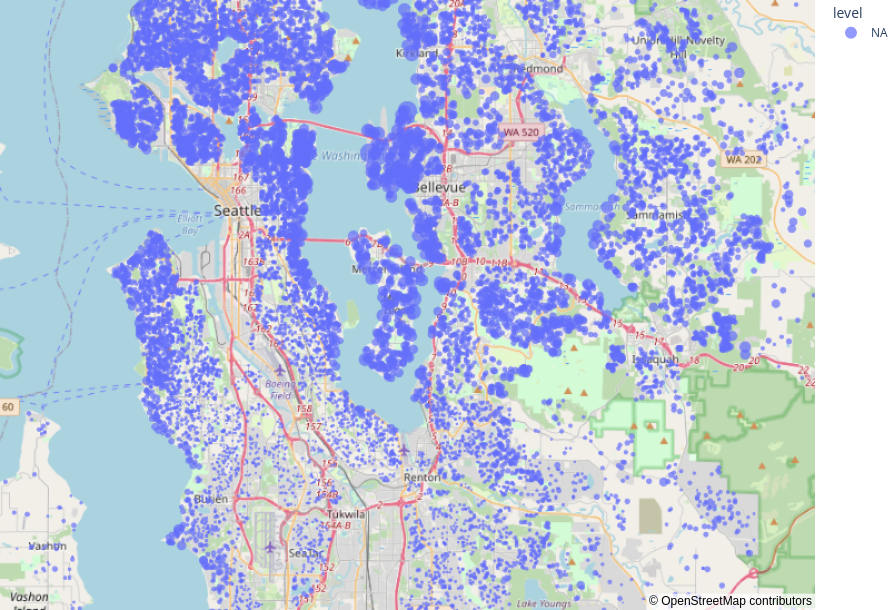

In [107]:
#map

fig = px.scatter_mapbox(houses,
                     lat= 'lat', lon='long',
                     color = 'level',
                     size='price',
                     color_continuous_scale = px.colors.cyclical.IceFire,
                     size_max = 15,
                     zoom = 10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600, margin = {'r':0,'l':0,'t':0,'b':0})


In [119]:
def data_collect(path):
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    data = pd.read_csv(path)
    show_dimentions(data)
    
def data_transform (data):
    # retorna em formato de dataframe
    numeric_attributes = data.select_dtypes(include= ['int64' , 'float64'])

    # mean
    media = pd.DataFrame(numeric_attributes.apply( np.mean ))
    #median
    mediana = pd.DataFrame(numeric_attributes.apply( np.median ))
    #std
    std = pd.DataFrame(numeric_attributes.apply( np.std ))
    #min
    min_ = pd.DataFrame(numeric_attributes.apply( np.min ))
    #max
    max_ = pd.DataFrame(numeric_attributes.apply( np.max ))

    df1 = pd.concat([max_,min_,media,mediana,std], axis = 'columns').reset_index()
    df1.columns = ['attributes','max','min','mean','median','std']


    # retorna em formato de dataframe
    numeric_attributes = data.select_dtypes(include= ['int64' , 'float64'])
    # mean
    media = pd.DataFrame(numeric_attributes.apply( np.mean ))
    #median
    mediana = pd.DataFrame(numeric_attributes.apply( np.median ))
    #std
    std = pd.DataFrame(numeric_attributes.apply( np.std ))
    #min
    min_ = pd.DataFrame(numeric_attributes.apply( np.min ))
    #max
    max_ = pd.DataFrame(numeric_attributes.apply( np.max ))

    df1 = pd.concat([max_,min_,media,mediana,std], axis = 'columns').reset_index()
    df1.columns = ['attributes','max','min','mean','median','std']

    show_dimentions(df1)

    data['dormitory_type'] = data['bedrooms'].apply([lambda x : 'studio' if x <= 1 else
                                                     'apartament' if x == 2 else
                                                     'house' if x > 2 else
                                                     np.NaN])
    show_dimentions(data)


    data['level'] = 'NA'

    houses = data[['id','lat','long','price','level']].copy()

    data['level'] = data['price'].apply(lambda x: 0 if x<= 321950 else
                                                  1 if x < 450000 else
                                                  2 if  x <645000 else
                                                  3 )

    cols = ['roads','house_number']
    df = data.head(20)

    collect_geodata(df,cols)

    data.loc[data['level']==3 ,['id','price','level']]

    
    
    
    return data
    
if __name__ == '__main__':
    
    # ETL
    
    # Collect
    data_raw = data_collect('/media/rey/Massa 2/Data_science/Data Science Em Produção - Meigarom Diego Fernandes Lopes/1. Python do ZERO ao DS/lab_local/dataset/kc_house_data.csv')
    
    # Transform
    
    data_processing = data_transform(data_raw)
    
    #load
    
    

rows: 21613

cols: 21



AttributeError: 'NoneType' object has no attribute 'select_dtypes'